In [645]:
from pathlib import Path
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
#import geopandas as gpd

In [646]:
melhousing = Path("C:/Users/Owner/Downloads/melb_data1fixed.csv")

In [647]:
melhousing_df=pd.read_csv(melhousing)
melhousing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lat,Long,Regionname,Propertycount,Year
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,12/3/2016,2.5,3067,...,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,2016.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2/4/2016,2.5,3067,...,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2016.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,3/4/2017,2.5,3067,...,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,2017.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,3/4/2017,2.5,3067,...,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,2017.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,6/4/2016,2.5,3067,...,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,2016.0


In [648]:
melhousing_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12212
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [649]:
melhousingclean_df=melhousing_df.drop(["BuildingArea","YearBuilt"],axis=1)
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      12212
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [650]:
melhousingclean_df["CouncilArea"]= melhousingclean_df["CouncilArea"].fillna(method="ffill")

C:\Users\Owner\AppData\Local\Temp\ipykernel_768\2740069353.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melhousingclean_df["CouncilArea"]= melhousingclean_df["CouncilArea"].fillna(method="ffill")


In [651]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      13580
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
dtype: int64

In [652]:
print(melhousingclean_df['Date'])

0        12/3/2016
1         2/4/2016
2         3/4/2017
3         3/4/2017
4         6/4/2016
           ...    
13575    8/26/2017
13576    8/26/2017
13577    8/26/2017
13578    8/26/2017
13579    8/26/2017
Name: Date, Length: 13580, dtype: object


In [653]:
melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'])
print(melhousingclean_df)
print(melhousingclean_df.dtypes)

              Suburb           Address  Rooms Type    Price Method   SellerG  \
0         Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h  2500000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

            Date  Distance  Postcode  B

In [654]:
melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], dayfirst=True)
print(melhousingclean_df['Date'].dtype)

datetime64[ns]


In [655]:
melhousingclean_df['FormattedDate'] = melhousingclean_df['Date'].dt.strftime('%m/%d/%Y')
print(melhousingclean_df['FormattedDate'])
melhousingclean_df.head(20)

0        12/03/2016
1        02/04/2016
2        03/04/2017
3        03/04/2017
4        06/04/2016
            ...    
13575    08/26/2017
13576    08/26/2017
13577    08/26/2017
13578    08/26/2017
13579    08/26/2017
Name: FormattedDate, Length: 13580, dtype: object


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,CouncilArea,Lat,Long,Regionname,Propertycount,Year,FormattedDate
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,...,1,1.0,202,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,2016.0,12/03/2016
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,...,1,0.0,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,2016.0,02/04/2016
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,...,2,0.0,134,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,2017.0,03/04/2017
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067,...,2,1.0,94,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,2017.0,03/04/2017
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,2.5,3067,...,1,2.0,120,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,2016.0,06/04/2016
5,Abbotsford,129 Charles St,2,h,941000,S,Jellis,2016-05-07,2.5,3067,...,1,0.0,181,Yarra,-37.8041,144.9953,Northern Metropolitan,4019,2016.0,05/07/2016
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016-05-07,2.5,3067,...,2,0.0,245,Yarra,-37.8024,144.9993,Northern Metropolitan,4019,2016.0,05/07/2016
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016-10-08,2.5,3067,...,1,2.0,256,Yarra,-37.8060,144.9954,Northern Metropolitan,4019,2016.0,10/08/2016
8,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,2016-10-08,2.5,3067,...,1,1.0,0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019,2016.0,10/08/2016
9,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,2016-10-08,2.5,3067,...,1,2.0,220,Yarra,-37.8010,144.9989,Northern Metropolitan,4019,2016.0,10/08/2016


In [656]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      13580
Lat              13580
Long             13580
Regionname       13580
Propertycount    13580
Year             13560
FormattedDate    13580
dtype: int64

In [657]:
melhousingdate_df = melhousingclean_df [["Date","Price","Type","Suburb"]]
replace_type = {
    'h': 'house',
    'u': 'unit',
    't': 'townhouse'
}
melhousingclean_df['Type'] = melhousingclean_df['Type'].replace(replace_type)
melhousingdate_df


,Date,Price,Type,Suburb
0,2016-12-03,1480000,h,Abbotsford
1,2016-02-04,1035000,h,Abbotsford
2,2017-03-04,1465000,h,Abbotsford
3,2017-03-04,850000,h,Abbotsford
4,2016-06-04,1600000,h,Abbotsford
...,...,...,...,...
13575,2017-08-26,1245000,h,Wheelers Hill
13576,2017-08-26,1031000,h,Williamstown
13577,2017-08-26,1170000,h,Williamstown
13578,2017-08-26,2500000,h,Williamstown


In [658]:
melhousingdatesorted_df= melhousingdate_df.sort_values(by='Date')
melhousingdatesorted_df

,Date,Price,Type,Suburb
6184,2016-01-28,1205000,h,Surrey Hills
6183,2016-01-28,813000,u,Surrey Hills
4029,2016-02-04,750000,u,Mont Albert
7168,2016-02-04,250000,u,Ormond
4709,2016-02-04,550000,u,Port Melbourne
...,...,...,...,...
13244,2017-09-23,1321188,h,Murrumbeena
13243,2017-09-23,840000,h,Mulgrave
13242,2017-09-23,880000,h,Mulgrave
13240,2017-09-23,1080000,h,Mulgrave


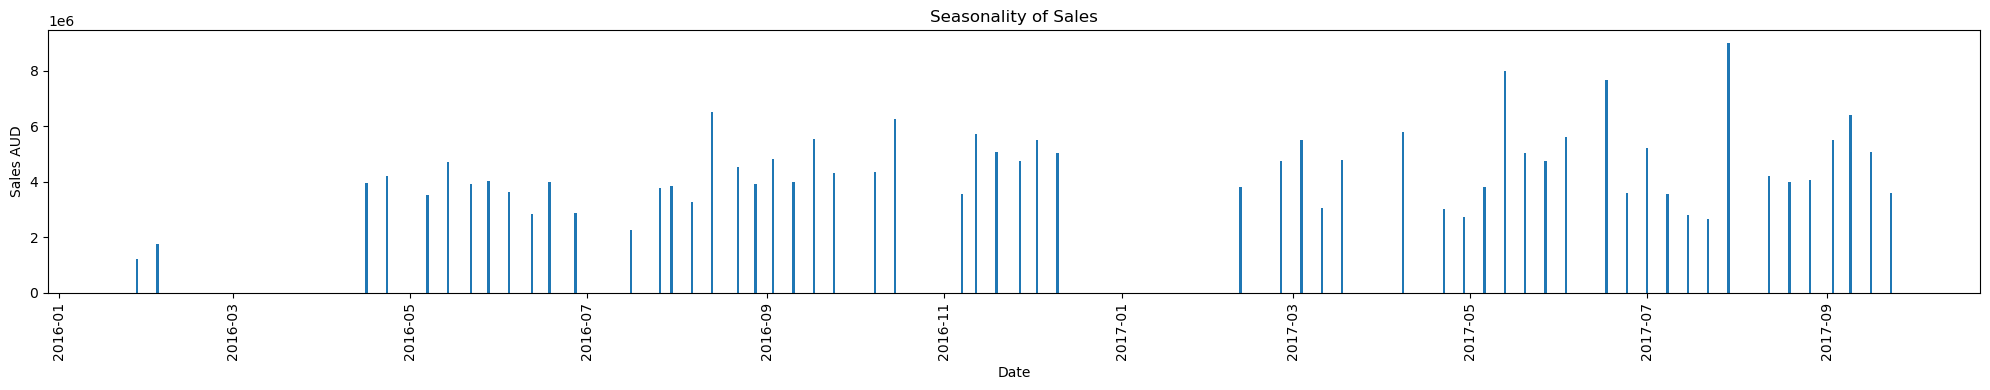

In [659]:
plt.figure(figsize=(20,4))
Date=melhousingdatesorted_df['Date']
Price=melhousingdatesorted_df['Price']
plt.bar(Date.values, Price.values, alpha=1.0, facecolor='#1f77b4', align="center")
plt.xlabel('Date')
plt.xticks (rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales')
plt.tight_layout()
plt.show()

In [660]:
# Step 1: Convert the 'Date' column to datetime
melhousingdatesorted2_df=melhousingdatesorted_df
melhousingdatesorted2_df['Date'] = pd.to_datetime(melhousingdatesorted_df['Date'], format='%m/%d/%Y')

In [661]:
# Step 2: Group by Year and Month and calculate the total Price for each group
melhousingdatesorted2_df['YearMonth'] = melhousingdatesorted_df['Date'].dt.to_period('M')  

# Create a Year-Month column
total_sales_per_month = melhousingdatesorted2_df.groupby('YearMonth')['Price'].sum()  

In [662]:
# Group by Year-Month and sum the Price
# Step 3: Display the result
print(total_sales_per_month)

YearMonth
2016-01       2018000
2016-02      23612750
2016-04     316741750
2016-05     940410800
2016-06     767406240
2016-07     419818446
2016-08     768646549
2016-09    1016925100
2016-10     587002688
2016-11    1244909014
2016-12     710747009
2017-02     465623838
2017-03     773771638
2017-04     649498826
2017-05    1281517889
2017-06    1202315325
2017-07    1363108186
2017-08     999126958
2017-09    1074588793
Freq: M, Name: Price, dtype: int64


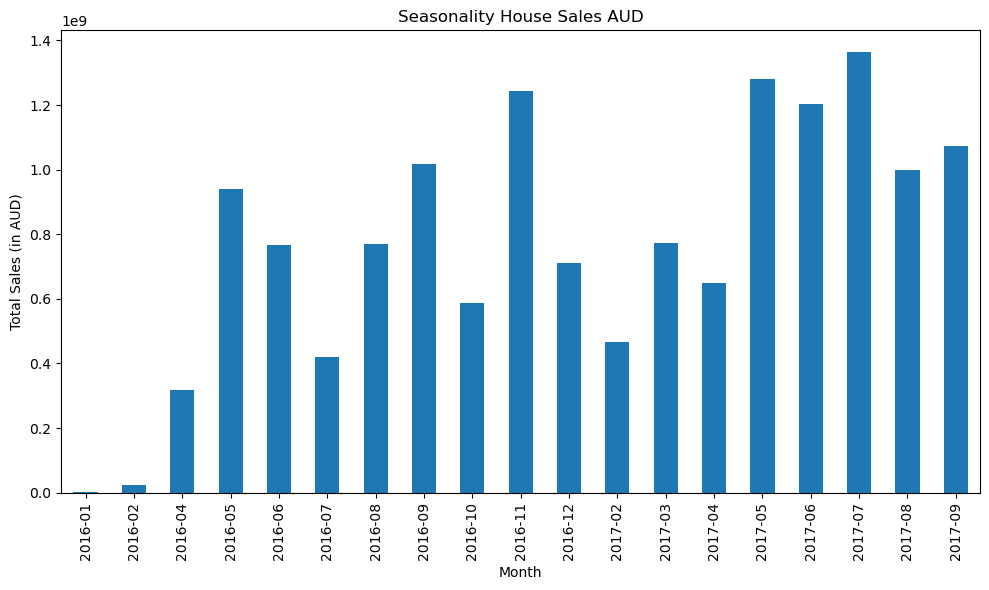

In [663]:
# Step 1: Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the plot
total_price_per_month.plot(kind='bar')

# Step 2: Customize the plot
plt.title('Seasonality House Sales AUD')
plt.xlabel('Month')
plt.ylabel('Total Sales (in AUD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Step 3: Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [664]:
Type_trends_df= melhousingclean_df [["Date","Price","Type"]]
Type_trends_df

,Date,Price,Type
0,2016-12-03,1480000,house
1,2016-02-04,1035000,house
2,2017-03-04,1465000,house
3,2017-03-04,850000,house
4,2016-06-04,1600000,house
...,...,...,...
13575,2017-08-26,1245000,house
13576,2017-08-26,1031000,house
13577,2017-08-26,1170000,house
13578,2017-08-26,2500000,house


In [665]:
Type_trends_h_df= Type_trends_df.query('Type=="house"')
Type_trends_h_df.head()

,Date,Price,Type
0,2016-12-03,1480000,house
1,2016-02-04,1035000,house
2,2017-03-04,1465000,house
3,2017-03-04,850000,house
4,2016-06-04,1600000,house


In [666]:
Typemonthly_data_monthly_h_df = Type_trends_h_df.resample('ME', on='Date').sum()
Typemonthly_data_monthly_h_df

,Price,Type
Date,,
2016-01-31,1205000,house
2016-02-29,16876750,househousehousehousehousehousehousehousehouseh...
2016-03-31,0,0
2016-04-30,255219000,househousehousehousehousehousehousehousehouseh...
2016-05-31,744249650,househousehousehousehousehousehousehousehouseh...
2016-06-30,593158400,househousehousehousehousehousehousehousehouseh...
2016-07-31,320044446,househousehousehousehousehousehousehousehouseh...
2016-08-31,607330221,househousehousehousehousehousehousehousehouseh...
2016-09-30,793750450,househousehousehousehousehousehousehousehouseh...


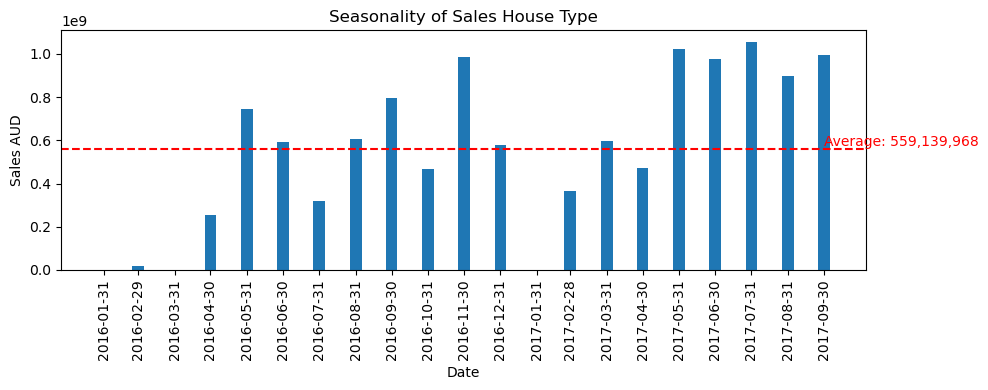

In [667]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Typemonthly_data_monthly_h_df.index
Price = Typemonthly_data_monthly_h_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales House Type')
plt.tight_layout()

plt.show()

In [668]:
Type_trends_u_df= Type_trends_df.query('Type=="unit"')
Type_trends_u_df.head()

,Date,Price,Type
8,2016-10-08,300000,unit
10,2016-11-12,700000,unit
12,2016-11-12,750000,unit
14,2016-05-14,441000,unit
22,2017-03-18,1090000,unit


In [669]:
Typemonthly_data_monthly_u_df = Type_trends_h_df.resample('ME', on='Date').sum()
Typemonthly_data_monthly_u_df

,Price,Type
Date,,
2016-01-31,1205000,house
2016-02-29,16876750,househousehousehousehousehousehousehousehouseh...
2016-03-31,0,0
2016-04-30,255219000,househousehousehousehousehousehousehousehouseh...
2016-05-31,744249650,househousehousehousehousehousehousehousehouseh...
2016-06-30,593158400,househousehousehousehousehousehousehousehouseh...
2016-07-31,320044446,househousehousehousehousehousehousehousehouseh...
2016-08-31,607330221,househousehousehousehousehousehousehousehouseh...
2016-09-30,793750450,househousehousehousehousehousehousehousehouseh...


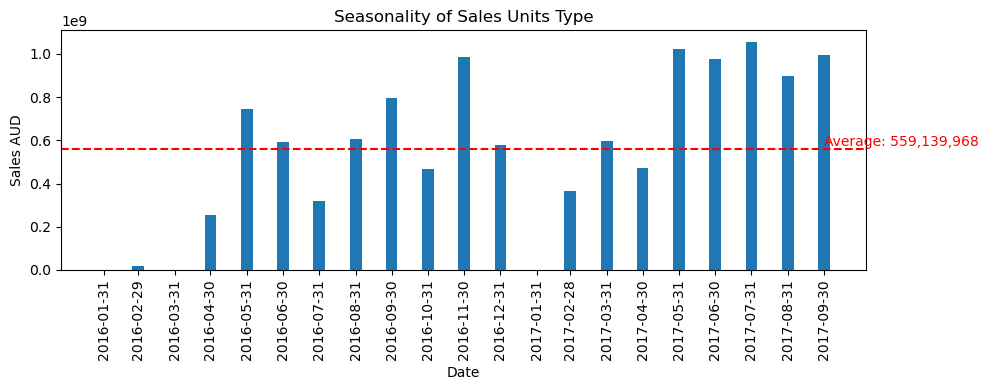

In [670]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Typemonthly_data_monthly_u_df.index
Price = Typemonthly_data_monthly_u_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales Units Type')
plt.tight_layout()

plt.show()

In [671]:
Type_trends_t_df= Type_trends_df.query('Type=="townhouse"')
Type_trends_t_df.head()

,Date,Price,Type
21,2017-03-18,900000,townhouse
38,2016-09-03,840000,townhouse
42,2017-03-04,700000,townhouse
48,2016-05-07,450000,townhouse
56,2016-10-15,700000,townhouse


In [672]:
Typemonthly_data_monthly_t_df = Type_trends_h_df.resample('ME', on='Date').sum()
Typemonthly_data_monthly_t_df

,Price,Type
Date,,
2016-01-31,1205000,house
2016-02-29,16876750,househousehousehousehousehousehousehousehouseh...
2016-03-31,0,0
2016-04-30,255219000,househousehousehousehousehousehousehousehouseh...
2016-05-31,744249650,househousehousehousehousehousehousehousehouseh...
2016-06-30,593158400,househousehousehousehousehousehousehousehouseh...
2016-07-31,320044446,househousehousehousehousehousehousehousehouseh...
2016-08-31,607330221,househousehousehousehousehousehousehousehouseh...
2016-09-30,793750450,househousehousehousehousehousehousehousehouseh...


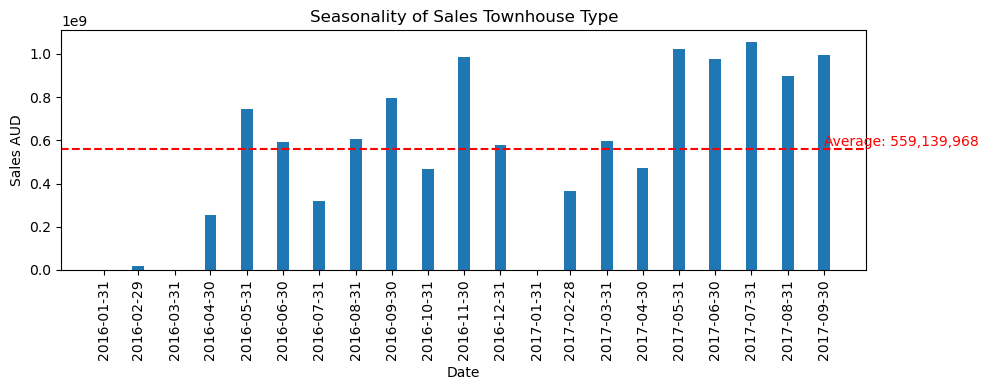

In [673]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Typemonthly_data_monthly_t_df.index
Price = Typemonthly_data_monthly_t_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Sales AUD')

plt.title('Seasonality of Sales Townhouse Type')
plt.tight_layout()

plt.show()

In [674]:
# Step 2: Group by Year and Month and calculate the total Price for each group
melhousingdatesorted2_df['YearMonth'] = melhousingdatesorted_df['Date'].dt.to_period('M')  

# Create a Year-Month column
total_avg_sales_per_month = melhousingdatesorted2_df.groupby('YearMonth')['Price'].mean()  
print(total_avg_sales_per_month)

YearMonth
2016-01    1.009000e+06
2016-02    9.081827e+05
2016-04    9.960432e+05
2016-05    1.046063e+06
2016-06    1.048369e+06
2016-07    9.412970e+05
2016-08    1.073529e+06
2016-09    1.099378e+06
2016-10    1.065341e+06
2016-11    1.117513e+06
2016-12    1.170918e+06
2017-02    1.116604e+06
2017-03    1.141256e+06
2017-04    1.029317e+06
2017-05    1.134087e+06
2017-06    1.095005e+06
2017-07    8.874402e+05
2017-08    1.197994e+06
2017-09    1.168031e+06
Freq: M, Name: Price, dtype: float64


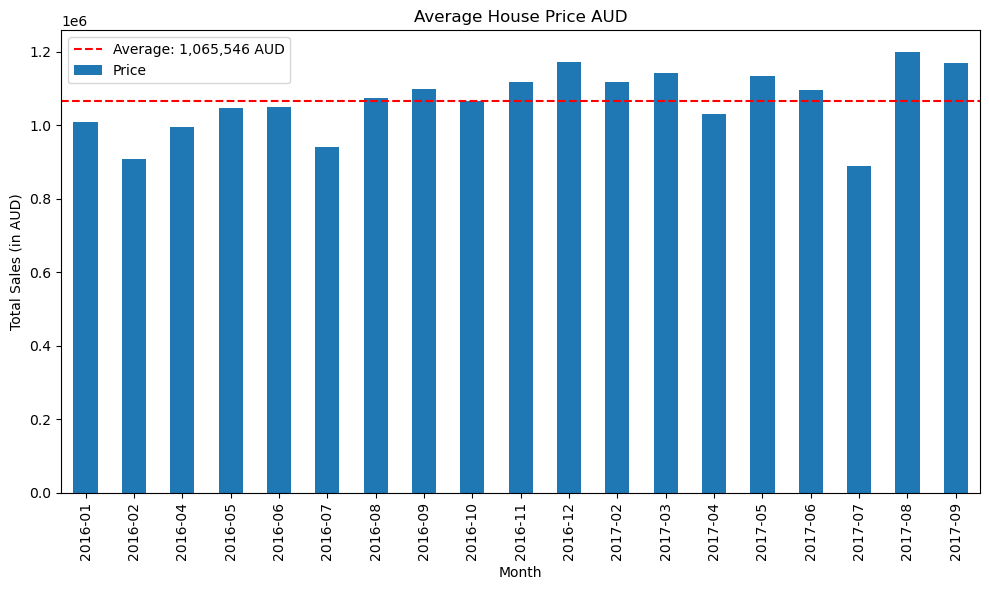

In [675]:
# Step 1: Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the plot
total_avg_sales_per_month.plot(kind='bar')

average_sales = total_avg_sales_per_month.mean()
plt.axhline(y=average_sales, color='red', linestyle='--', label=f'Average: {average_sales:,.0f} AUD')

# Step 2: Customize the plot
plt.title('Average House Price AUD')
plt.xlabel('Month')
plt.ylabel('Total Sales (in AUD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Step 3: Show the plot
plt.legend()
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [676]:
numberofrooms_trends_df= melhousingclean_df [["Date","Price","Bedroom2"]]
numberofrooms_trends_df

,Date,Price,Bedroom2
0,2016-12-03,1480000,2
1,2016-02-04,1035000,2
2,2017-03-04,1465000,3
3,2017-03-04,850000,3
4,2016-06-04,1600000,3
...,...,...,...
13575,2017-08-26,1245000,4
13576,2017-08-26,1031000,3
13577,2017-08-26,1170000,3
13578,2017-08-26,2500000,4


In [677]:
Bedroomprices_1_df= numberofrooms_trends_df.query('Bedroom2==1')
Bedroomprices_1_df.head()


,Date,Price,Bedroom2
8,2016-10-08,300000,1
14,2016-05-14,441000,1
26,2016-08-22,426000,1
28,2016-08-22,457000,1
33,2016-07-26,470000,1


In [678]:
Bedroomprices1_monthly_df= Bedroomprices_1_df.resample('ME', on='Date').mean()
Bedroomprices1_monthly_df.head()

,Price,Bedroom2
Date,,
2016-02-29,233000.000000,1.0
2016-03-31,NaN,NaN
2016-04-30,360576.923077,1.0
2016-05-31,445636.363636,1.0
2016-06-30,474861.111111,1.0


In [679]:
Bedroomprices1_monthly_df= Bedroomprices_1_df.resample('ME', on='Date').mean()
Bedroomprices1_monthly_df.fillna(0, inplace=True)
Bedroomprices1_monthly_df

,Price,Bedroom2
Date,,
2016-02-29,233000.000000,1.0
2016-03-31,0.000000,0.0
2016-04-30,360576.923077,1.0
2016-05-31,445636.363636,1.0
2016-06-30,474861.111111,1.0
2016-07-31,430533.333333,1.0
2016-08-31,449900.000000,1.0
2016-09-30,440050.000000,1.0
2016-10-31,422567.647059,1.0


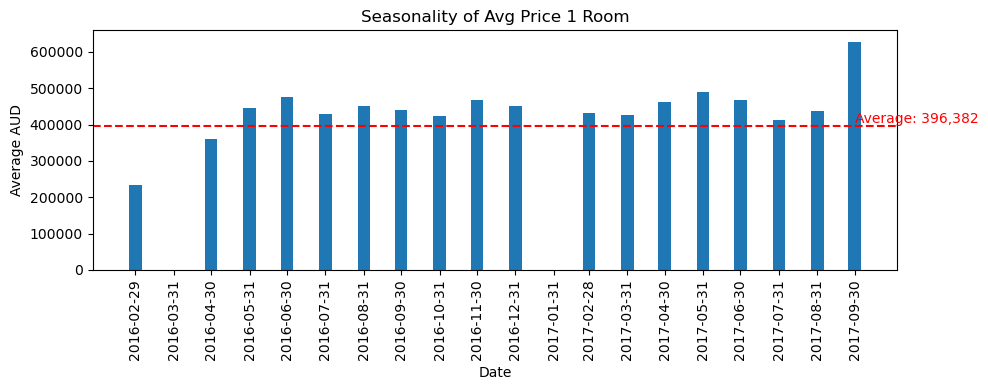

In [729]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices1_monthly_df.index
Price = Bedroomprices1_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 1 Room')
plt.tight_layout()

plt.show()

In [681]:
Bedroomprices_2_df= numberofrooms_trends_df.query('Bedroom2==2')
Bedroomprices_2_df.head()

,Date,Price,Bedroom2
0,2016-12-03,1480000,2
1,2016-02-04,1035000,2
5,2016-05-07,941000,2
7,2016-10-08,1636000,2
10,2016-11-12,700000,2


In [682]:
Bedroomprices2_monthly_df= Bedroomprices_2_df.resample('ME', on='Date').mean()
Bedroomprices2_monthly_df.fillna(0, inplace=True)
Bedroomprices2_monthly_df
#Bedroomprices2_monthlyf_df['Price'] = Bedroomprices2_monthly_df['Price'].apply(lambda x: f'{x:,.0f}')

,Price,Bedroom2
Date,,
2016-01-31,813000.000000,2.0
2016-02-29,805250.000000,2.0
2016-03-31,0.000000,0.0
2016-04-30,763943.181818,2.0
2016-05-31,745913.368056,2.0
2016-06-30,756934.666667,2.0
2016-07-31,716112.820513,2.0
2016-08-31,785976.790514,2.0
2016-09-30,798406.535948,2.0


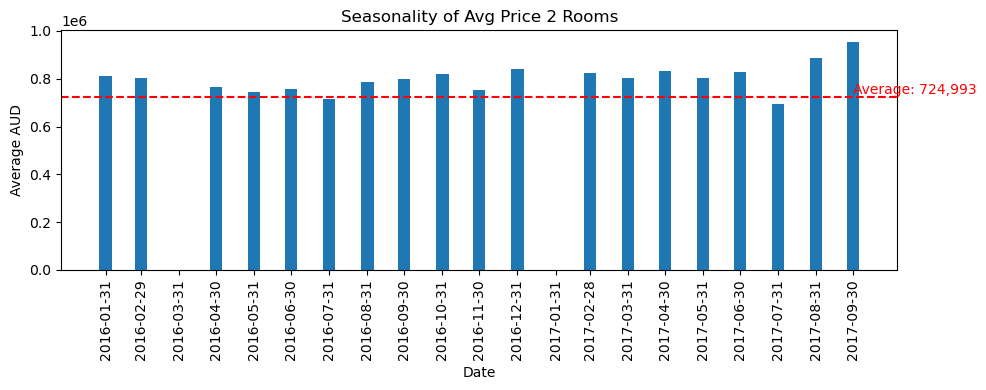

In [730]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices2_monthly_df.index
Price = Bedroomprices2_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 2 Rooms')
plt.tight_layout()

plt.show()

In [684]:
Bedroomprices_3_df= numberofrooms_trends_df.query('Bedroom2==3')

Bedroomprices_3_df.head()


,Date,Price,Bedroom2
2,2017-03-04,1465000,3
3,2017-03-04,850000,3
4,2016-06-04,1600000,3
9,2016-10-08,1097000,3
11,2016-11-12,1350000,3


In [685]:
Bedroomprices3_monthly_df= Bedroomprices_3_df.resample('ME', on='Date').mean()
Bedroomprices3_monthly_df.fillna(0, inplace=True)
Bedroomprices3_monthly_df

,Price,Bedroom2
Date,,
2016-01-31,1.205000e+06,3.0
2016-02-29,1.067054e+06,3.0
2016-03-31,0.000000e+00,0.0
2016-04-30,1.042850e+06,3.0
2016-05-31,1.085152e+06,3.0
2016-06-30,1.110174e+06,3.0
2016-07-31,1.075855e+06,3.0
2016-08-31,1.123935e+06,3.0
2016-09-30,1.180886e+06,3.0


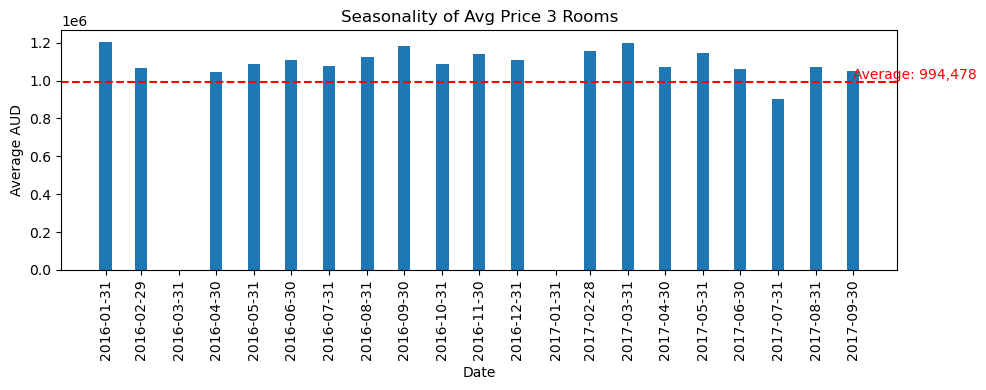

In [731]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices3_monthly_df.index
Price = Bedroomprices3_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 3 Rooms')
plt.tight_layout()

plt.show()

In [687]:
Bedroomprices_4_df= numberofrooms_trends_df.query('Bedroom2==4')
Bedroomprices_4_df.head()


,Date,Price,Bedroom2
6,2016-05-07,1876000,4
20,2017-03-18,1330000,4
30,2016-09-24,1542000,4
74,2016-09-24,978000,4
76,2016-11-27,765000,4


In [688]:
Bedroomprices4_monthly_df= Bedroomprices_4_df.resample('ME', on='Date').mean()
Bedroomprices4_monthly_df.fillna(0, inplace=True)
Bedroomprices4_monthly_df

,Price,Bedroom2
Date,,
2016-02-29,8.830000e+05,4.0
2016-03-31,0.000000e+00,0.0
2016-04-30,1.493453e+06,4.0
2016-05-31,1.544042e+06,4.0
2016-06-30,1.489619e+06,4.0
2016-07-31,1.250465e+06,4.0
2016-08-31,1.674817e+06,4.0
2016-09-30,1.544586e+06,4.0
2016-10-31,1.641904e+06,4.0


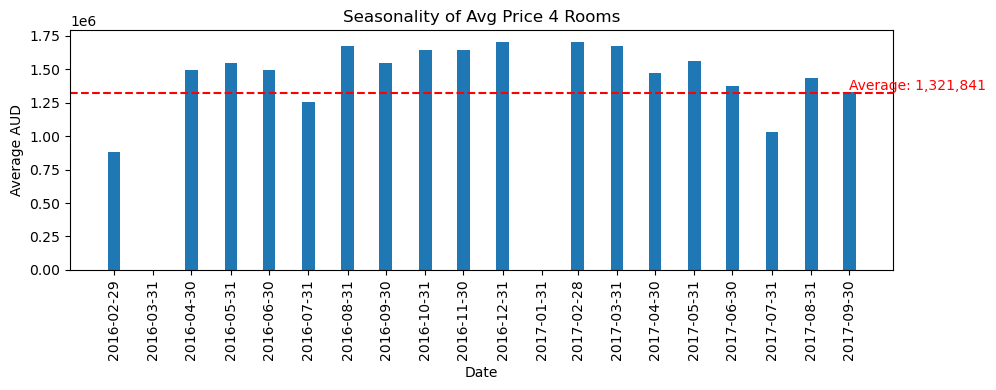

In [732]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices4_monthly_df.index
Price = Bedroomprices4_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 4 Rooms')
plt.tight_layout()

plt.show()

In [690]:
Bedroomprices_5_df= numberofrooms_trends_df.query('Bedroom2==5')
Bedroomprices_5_df.head()

,Date,Price,Bedroom2
63,2016-09-17,773000,5
93,2016-12-10,2100000,5
124,2016-06-12,2840000,5
142,2016-12-03,1525000,5
186,2016-09-03,1085000,5


In [691]:
Bedroomprices5_monthly_df= Bedroomprices_5_df.resample('ME', on='Date').mean()
Bedroomprices5_monthly_df.fillna(0,inplace=True)
Bedroomprices5_monthly_df

,Price,Bedroom2
Date,,
2016-04-30,1.483583e+06,5.0
2016-05-31,2.089042e+06,5.0
2016-06-30,1.883333e+06,5.0
2016-07-31,1.467000e+06,5.0
2016-08-31,2.093909e+06,5.0
2016-09-30,1.952290e+06,5.0
2016-10-31,2.044190e+06,5.0
2016-11-30,2.233269e+06,5.0
2016-12-31,2.355943e+06,5.0


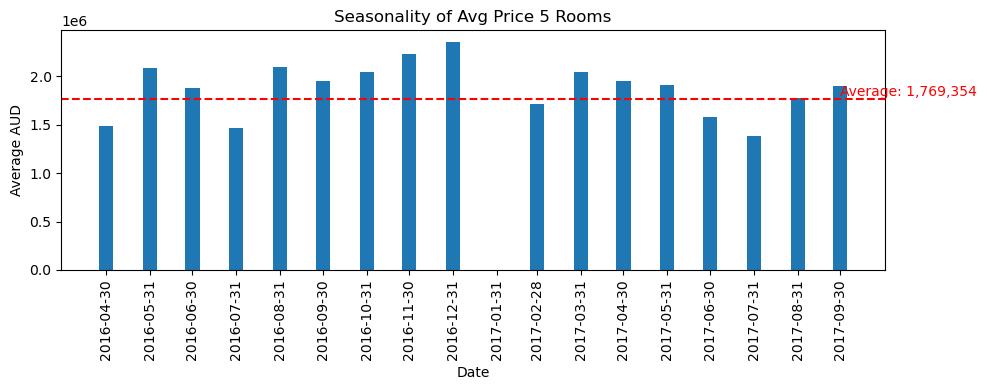

In [733]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices5_monthly_df.index
Price = Bedroomprices5_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 5 Rooms')
plt.tight_layout()

plt.show()

In [693]:
Bedroomprices_6_df= numberofrooms_trends_df.query('Bedroom2==6')
Bedroomprices_6_df.head()

,Date,Price,Bedroom2
47,2016-05-07,725000,6
292,2016-06-04,2425000,6
392,2016-08-22,2752000,6
515,2016-12-03,4000000,6
663,2016-05-22,1900000,6


In [694]:
Bedroomprices6_monthly_df= Bedroomprices_6_df.resample('ME', on='Date').mean()
Bedroomprices6_monthly_df.fillna(0, inplace=True)
Bedroomprices6_monthly_df

,Price,Bedroom2
Date,,
2016-05-31,1.556250e+06,6.0
2016-06-30,2.068750e+06,6.0
2016-07-31,1.440500e+06,6.0
2016-08-31,4.626000e+06,6.0
2016-09-30,1.666000e+06,6.0
2016-10-31,0.000000e+00,0.0
2016-11-30,2.125000e+06,6.0
2016-12-31,2.268000e+06,6.0
2017-01-31,0.000000e+00,0.0


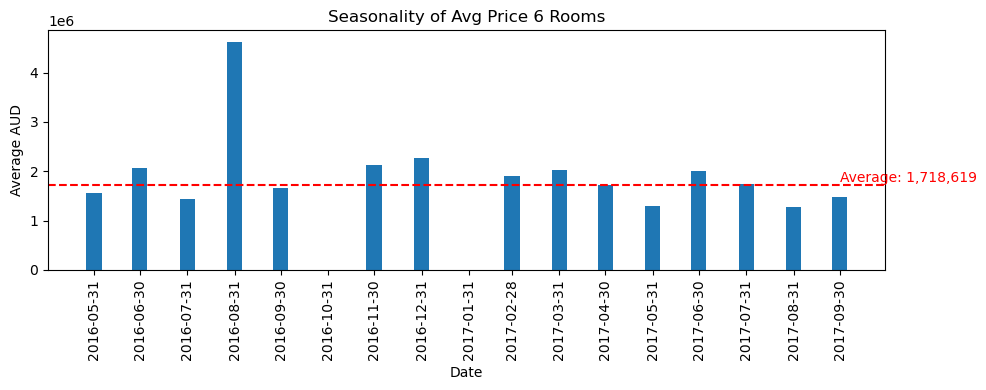

In [734]:
plt.figure(figsize=(10,4))

# Use the index as Date since 'Date' is now the index after resampling
Date = Bedroomprices6_monthly_df.index
Price = Bedroomprices6_monthly_df['Price']

# Bar plot with Date as the x-axis and Price as the y-axis
plt.bar(Date, Price, alpha=1.0, width=10, facecolor='#1f77b4', align="center")
average_price = Price.mean()
plt.axhline(y=average_price, color='red', linestyle='--', label=f'Average: {average_price:,.0f}') #label=f'Average: {round(average_price, 2)}')
plt.text(Date[-1], average_price, f'Average: {average_price:,.0f}', color='red', va='bottom') #f'Average: {round(average_price, 2)}'

plt.xlabel('Date')
plt.xticks (Date[::1],rotation ="vertical")
plt.ylabel('Average AUD')

plt.title('Seasonality of Avg Price 6 Rooms')
plt.tight_layout()

plt.show()

In [696]:
Bedroom_sales_year = melhousingclean_df.groupby(['Year', 'Bedroom2']).size().reset_index(name='Count')
Bedroom_sales_year

,Year,Bedroom2,Count
0,2016.0,0,10
1,2016.0,1,380
2,2016.0,2,2065
3,2016.0,3,2621
4,2016.0,4,1010
5,2016.0,5,219
6,2016.0,6,20
7,2017.0,0,6
8,2017.0,1,311
9,2017.0,2,1672


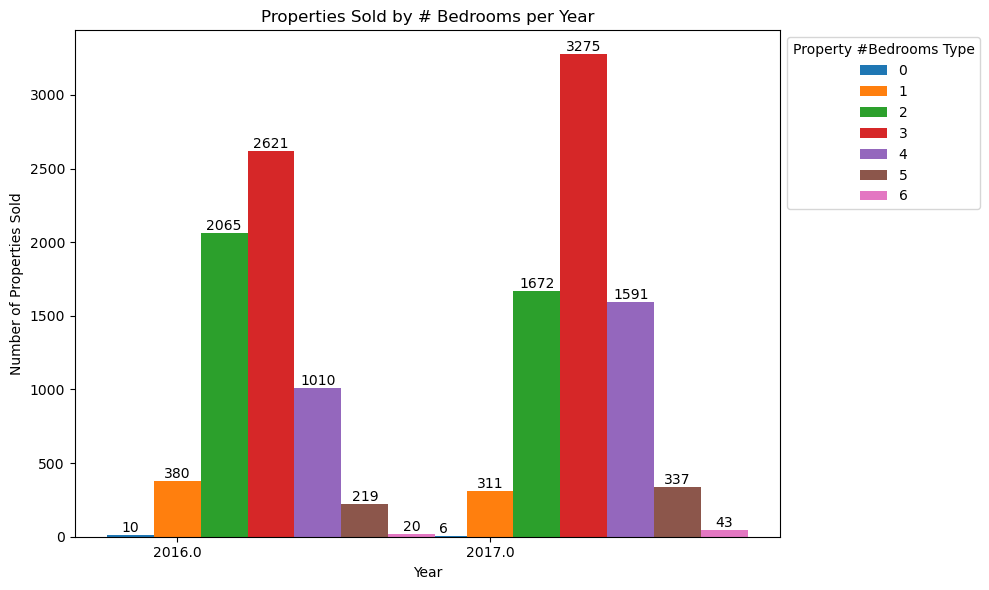

In [697]:
# Step 1: Group the data by 'Year' and 'Type' and count occurrences
#house_per_year = melhousingclean_df.groupby(['Year', 'Type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))

Sales_Roomtypes = Bedroom_sales_year['Bedroom2'].unique()
years = Bedroom_sales_year['Year'].unique()

bar_width = 0.15
positions = list(range(len(years)))

for i, Sales_Roomtypes in enumerate(Sales_Roomtypes):
    subset = Bedroom_sales_year[Bedroom_sales_year['Bedroom2'] == Sales_Roomtypes]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Count'], width=bar_width, label=Sales_Roomtypes)
    
    # Step 3: Add counts on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.title('Properties Sold by # Bedrooms per Year')
plt.xticks([p + bar_width for p in positions], years)
plt.legend(title='Property #Bedrooms Type', loc='upper left', bbox_to_anchor=(1, 1))

# Display the chart
plt.tight_layout()
plt.show()

In [698]:
# Group by 'Year' and 'number of rooms' (replace with actual column names if different)
avg_price_per_year = melhousingclean_df.groupby(['Year', 'Bedroom2'])['Price'].mean().reset_index()

# Rename the columns for clarity
avg_price_per_year.columns = ['Year', 'Rooms', 'Average_Price']

# Display the resulting DataFrame
print(avg_price_per_year)

      Year  Rooms  Average_Price
0   2016.0      0   1.039200e+06
1   2016.0      1   4.454258e+05
2   2016.0      2   7.740983e+05
3   2016.0      3   1.115431e+06
4   2016.0      4   1.575171e+06
5   2016.0      5   2.038360e+06
6   2016.0      6   2.194450e+06
7   2017.0      0   1.015250e+06
8   2017.0      1   4.495510e+05
9   2017.0      2   8.044380e+05
10  2017.0      3   1.056142e+06
11  2017.0      4   1.374188e+06
12  2017.0      5   1.734238e+06
13  2017.0      6   1.663407e+06


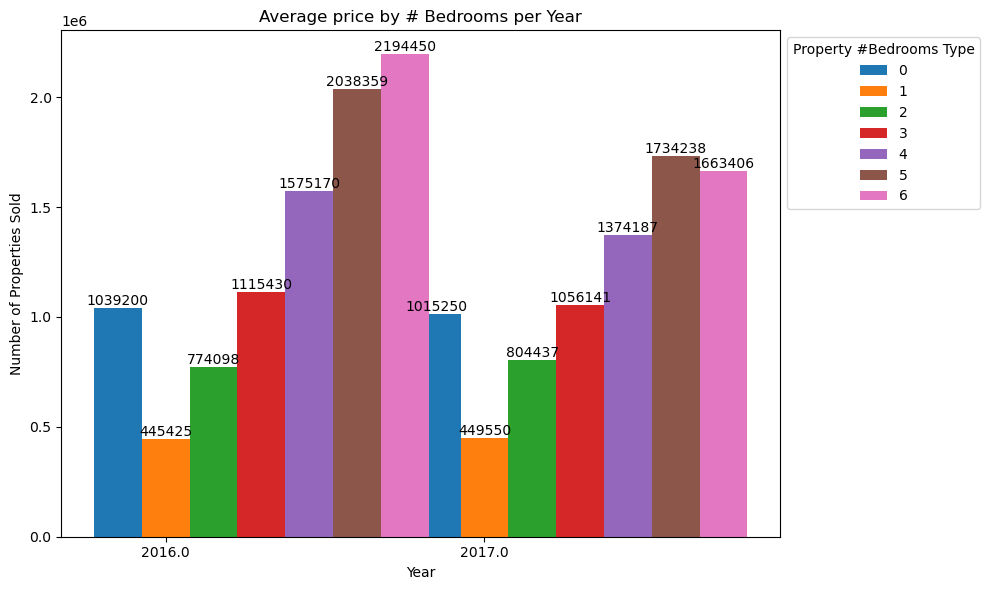

In [699]:
# Step 1: Group the data by 'Year' and 'Type' and count occurrences

plt.figure(figsize=(10, 6))

Average_price_Roomtypes = avg_price_per_year['Rooms'].unique()
Year = avg_price_per_year['Year'].unique()

bar_width = 0.15
positions = list(range(len(years)))

for i, Average_price_Roomtypes in enumerate(Average_price_Roomtypes):
    subset = avg_price_per_year[avg_price_per_year['Rooms'] == Average_price_Roomtypes]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Average_Price'], width=bar_width, label=Average_price_Roomtypes)
    
    # Step 3: Add counts on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties Sold')
plt.title('Average price by # Bedrooms per Year')
plt.xticks([p + bar_width for p in positions], years)
plt.legend(title='Property #Bedrooms Type', loc='upper left', bbox_to_anchor=(1, 1))

# Display the chart
plt.tight_layout()
plt.show()

In [700]:
filtered_data = avg_price_per_year[avg_price_per_year['Year'].isin([2016, 2017])]
filtered_data

,Year,Rooms,Average_Price
0,2016.0,0,1.039200e+06
1,2016.0,1,4.454258e+05
2,2016.0,2,7.740983e+05
3,2016.0,3,1.115431e+06
4,2016.0,4,1.575171e+06
5,2016.0,5,2.038360e+06
6,2016.0,6,2.194450e+06
7,2017.0,0,1.015250e+06
8,2017.0,1,4.495510e+05
9,2017.0,2,8.044380e+05


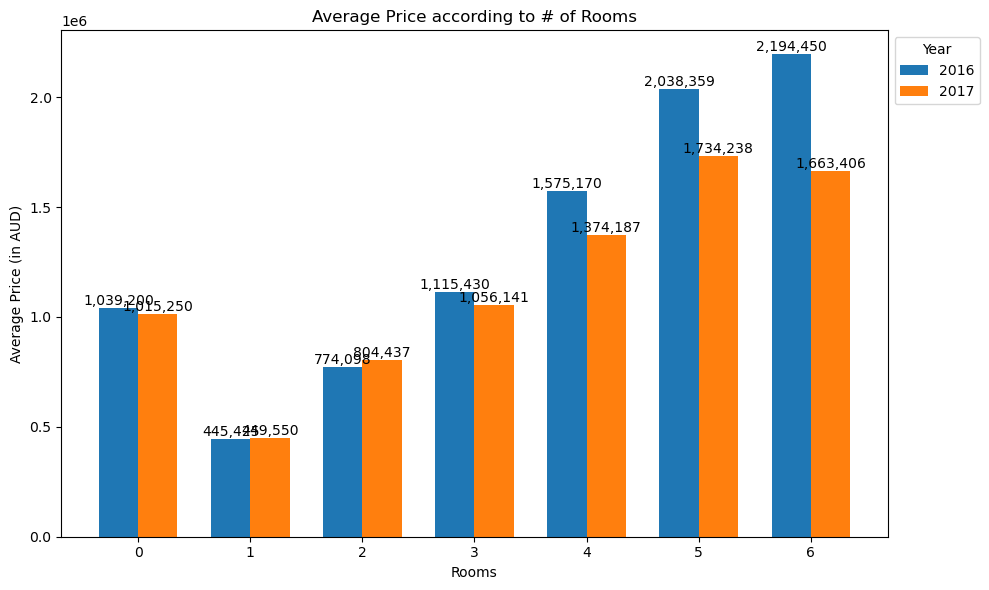

In [701]:
plt.figure(figsize=(10, 6))

years = [2016, 2017]  
Roomtypes = filtered_data['Rooms'].unique()  # Get the unique room numbers

bar_width = 0.35  # Adjust the width of the bars
positions = list(range(len(Roomtypes)))  # Set the positions for the rooms

# Step 3: Loop through the years and plot bars for each year
for i, year in enumerate(years):
    subset = filtered_data[filtered_data['Year'] == year]
    bars = plt.bar([p + i * bar_width for p in positions], subset['Average_Price'], width=bar_width, label=year)
    
    # Step 4: Add average prices on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Rooms')
plt.ylabel('Average Price (in AUD)')
plt.title('Average Price according to # of Rooms')
plt.xticks([p + bar_width / 2 for p in positions], Roomtypes)  # Center the labels for rooms
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Step 5: Display the chart
plt.tight_layout()
plt.show()

In [702]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Regionname" 
)
mat_plot_3

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Regionname)

In [703]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Type" 
    legend='bottom'
).opts(legend_opts={'House': '12pt', 'label_fontsize': '10pt'})
)
mat_plot_3

SyntaxError: unmatched ')' (107111480.py, line 13)

In [704]:
#creating Ranges for #rooms to be mapped

# Define the rooms bins and corresponding labels
bins = [0, 2, 3, 4,5, float('inf')]  # Rooms ranges
labels = [ '0-2 Rooms', '3 Rooms', '4 Rooms' ,'5 Rooms','>5 Rooms']  # Labels for each range

# Create a new column 'Price_Range' based on the 'Price' column
melhousingclean_df['Rooms_Range'] = pd.cut(melhousingclean_df['Bedroom2'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(melhousingclean_df)

              Suburb           Address  Rooms   Type    Price Method  \
0         Abbotsford      85 Turner St      2  house  1480000      S   
1         Abbotsford   25 Bloomburg St      2  house  1035000      S   
2         Abbotsford      5 Charles St      3  house  1465000     SP   
3         Abbotsford  40 Federation La      3  house   850000     PI   
4         Abbotsford       55a Park St      4  house  1600000     VB   
...              ...               ...    ...    ...      ...    ...   
13575  Wheelers Hill      12 Strada Cr      4  house  1245000      S   
13576   Williamstown     77 Merrett Dr      3  house  1031000     SP   
13577   Williamstown       83 Power St      3  house  1170000      S   
13578   Williamstown      96 Verdon St      4  house  2500000     PI   
13579     Yarraville        6 Agnes St      4  house  1285000     SP   

        SellerG       Date  Distance  Postcode  ...  Car  Landsize  \
0        Biggin 2016-12-03       2.5      3067  ...  1.0       20

In [705]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Rooms_Range" 
)
mat_plot_3

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Rooms_Range)

In [706]:
room_counts=  melhousingclean_df['Bedroom2'].value_counts()
print(room_counts)

Bedroom2
3     5896
2     3737
4     2601
1      691
5      556
6       63
0       16
7       10
8        5
9        3
20       1
10       1
Name: count, dtype: int64


In [707]:
#creating Ranges for prices to be mapped

# Define the price bins and corresponding labels
bins = [0, 400000, 600000, 800000,1000000,1500000,2000000, float('inf')]  # Price ranges
labels = [ '<400K', '<600K', '<800K' ,'<1MM','<1.5MM','<2MM','>2MM']  # Labels for each range

# Create a new column 'Price_Range' based on the 'Price' column
melhousingclean_df['Price_Range'] = pd.cut(melhousingclean_df['Price'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(melhousingclean_df)


              Suburb           Address  Rooms   Type    Price Method  \
0         Abbotsford      85 Turner St      2  house  1480000      S   
1         Abbotsford   25 Bloomburg St      2  house  1035000      S   
2         Abbotsford      5 Charles St      3  house  1465000     SP   
3         Abbotsford  40 Federation La      3  house   850000     PI   
4         Abbotsford       55a Park St      4  house  1600000     VB   
...              ...               ...    ...    ...      ...    ...   
13575  Wheelers Hill      12 Strada Cr      4  house  1245000      S   
13576   Williamstown     77 Merrett Dr      3  house  1031000     SP   
13577   Williamstown       83 Power St      3  house  1170000      S   
13578   Williamstown      96 Verdon St      4  house  2500000     PI   
13579     Yarraville        6 Agnes St      4  house  1285000     SP   

        SellerG       Date  Distance  Postcode  ...  Landsize  CouncilArea  \
0        Biggin 2016-12-03       2.5      3067  ...      

In [708]:
mat_plot_3= melhousingclean_df.hvplot.points(
    "Long", 
    "Lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    size="price",
    scale=0.01,
    color="Price_Range" 
)
mat_plot_3

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Long,Lat]   (Price_Range)

In [709]:
Price_range_counts=  melhousingclean_df['Price_Range'].value_counts()
print(Price_range_counts)

Price_Range
<1.5MM    3302
<800K     2712
<1MM      2370
<600K     2042
<2MM      1476
>2MM      1062
<400K      616
Name: count, dtype: int64


C:\Users\Owner\AppData\Local\Temp\ipykernel_768\3541428967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bedroom2', y='Price', data=melhousingclean_df, palette='coolwarm' )


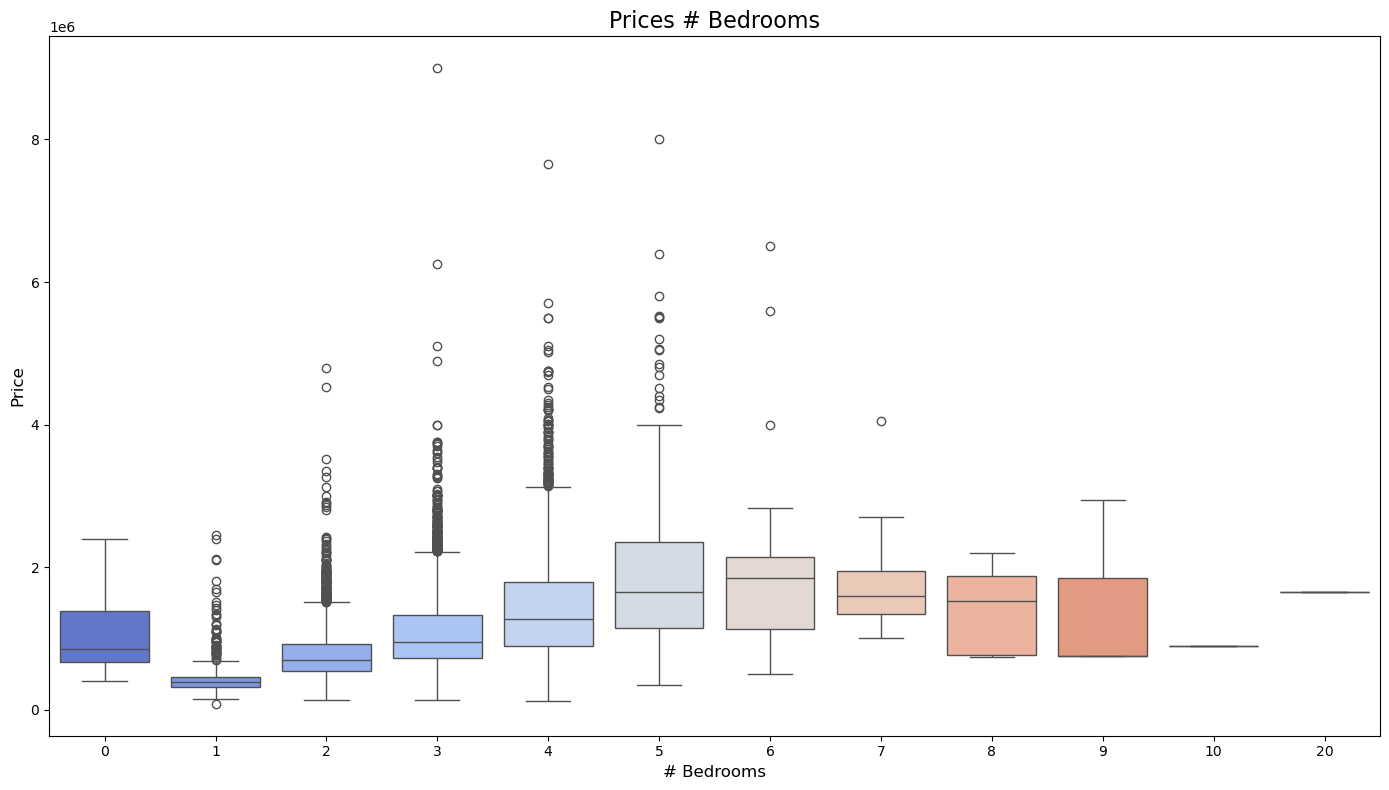

In [710]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='Bedroom2', y='Price', data=melhousingclean_df, palette='coolwarm' )

plt.title('Prices # Bedrooms', fontsize=16)
plt.xlabel('# Bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()  

plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_768\149398794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bathroom', y='Price', data=melhousingclean_df, palette='coolwarm' )


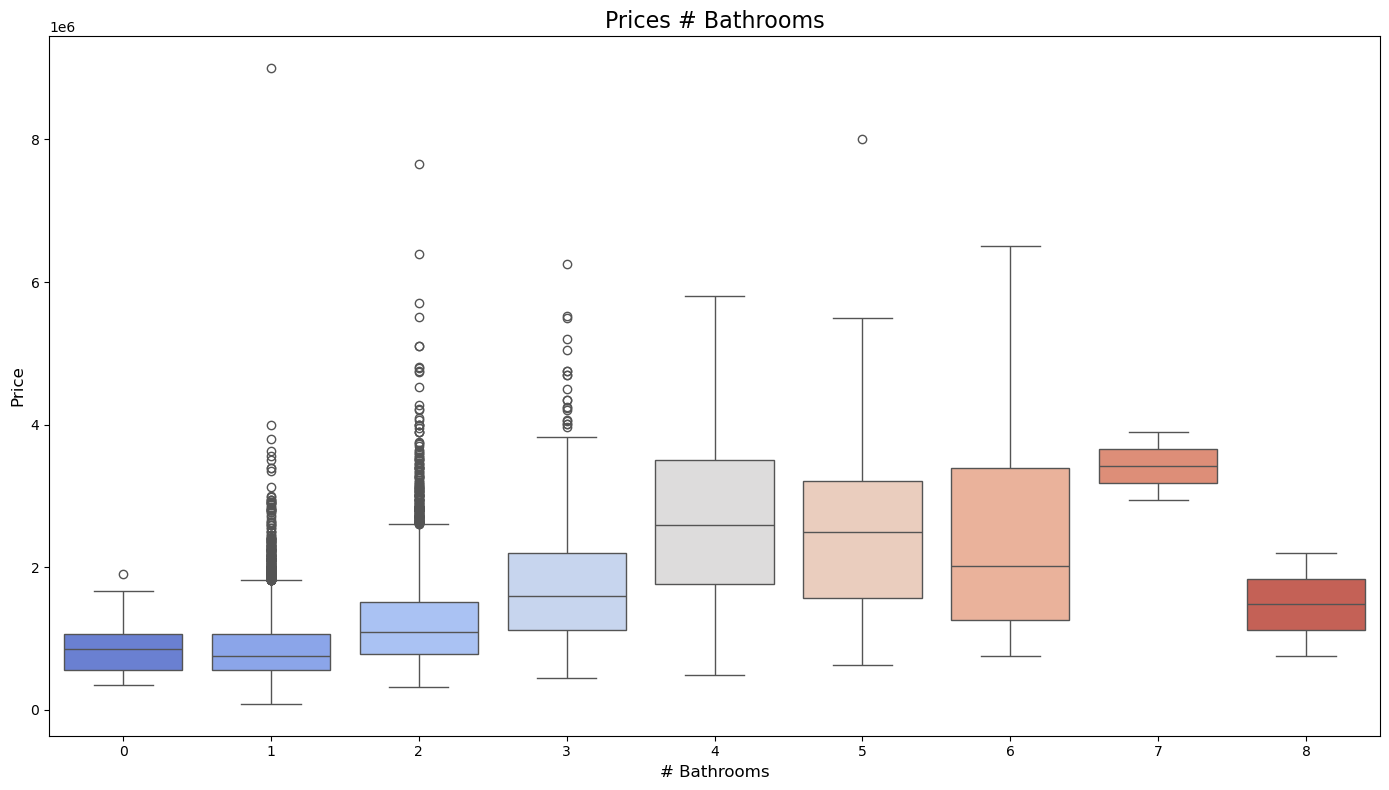

In [711]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='Bathroom', y='Price', data=melhousingclean_df, palette='coolwarm' )

plt.title('Prices # Bathrooms', fontsize=16)
plt.xlabel('# Bathrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()  

plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_768\162668599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Price', data=melhousingclean_df, palette='coolwarm' )


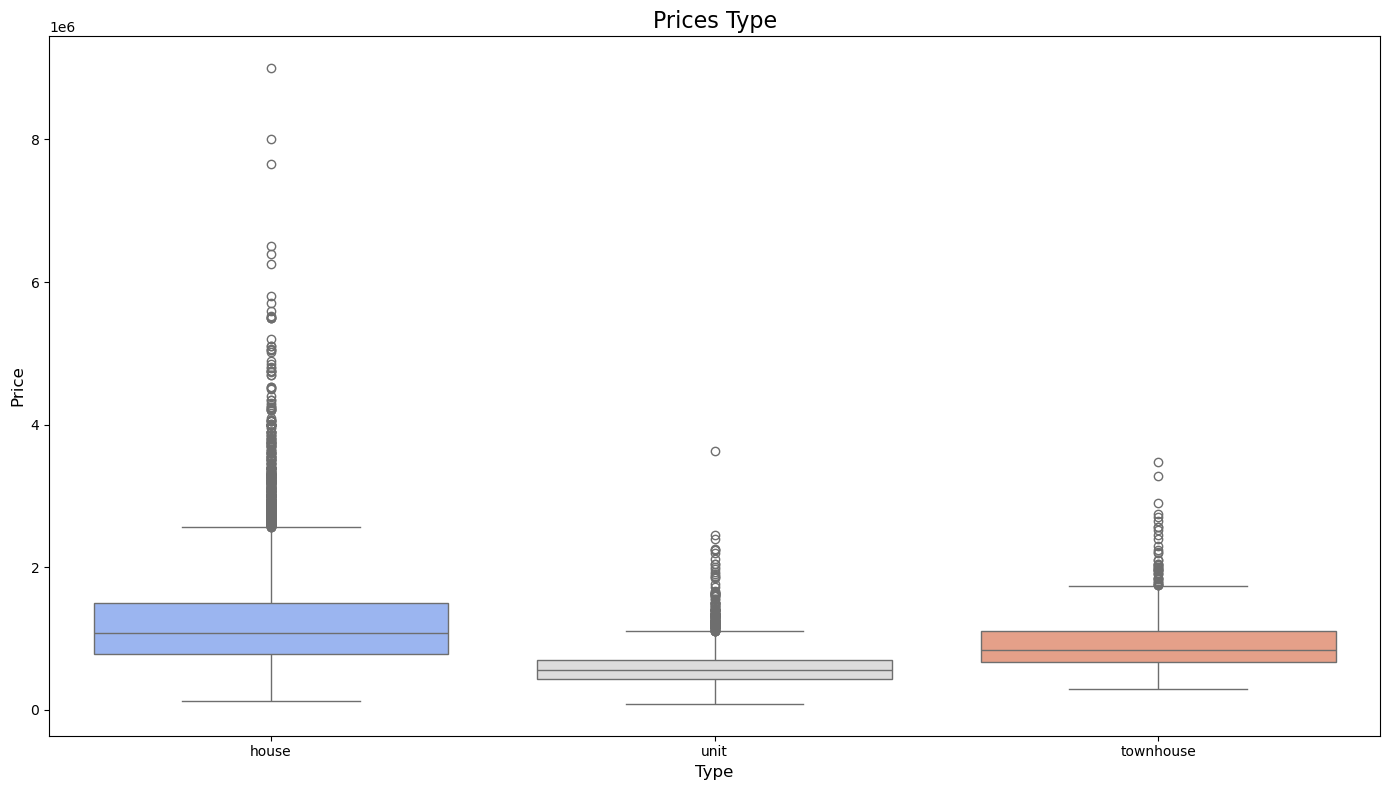

In [712]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='Type', y='Price', data=melhousingclean_df, palette='coolwarm' )

plt.title('Prices Type', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()  

plt.show()

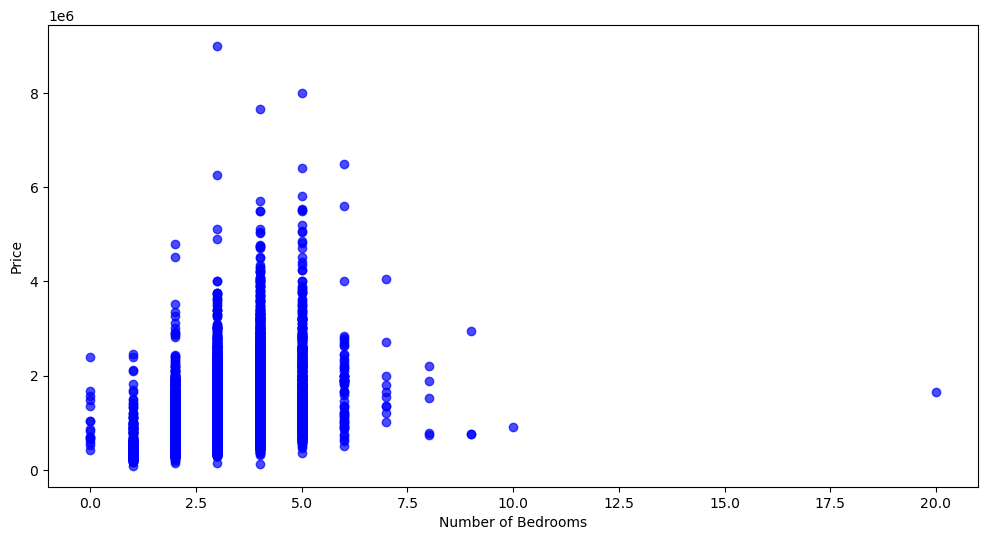

In [719]:
plt.figure (figsize=(12,6))

plt.scatter(melhousingclean_df['Bedroom2'],melhousingclean_df['Price'],color='blue',alpha=0.7)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()
           

In [720]:
correlation = melhousingclean_df['Bedroom2'].corr(melhousingclean_df['Price'])
print(f"The correlation between Number of Bedrooms and Price: {correlation:.2f}")

The correlation between Number of Bedrooms and Price: 0.48


The r-squared is: 0.22652938522037233


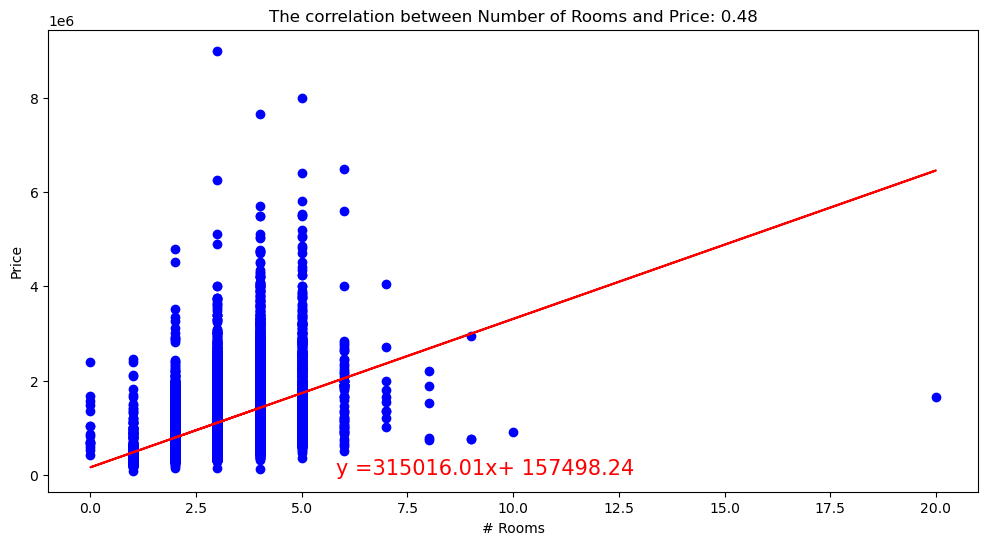

In [728]:
#linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(melhousingclean_df['Bedroom2'], melhousingclean_df['Price'])

#to create the plot
x_values = melhousingclean_df['Bedroom2']
y_values = slope * x_values + intercept
line_eq= "y ="+ str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.figure(figsize=(12, 6))
plt.scatter(melhousingclean_df['Bedroom2'], melhousingclean_df['Price'], color='blue')
plt.plot(x_values, y_values, color='red')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title(f"The correlation between Number of Rooms and Price: {correlation:.2f}")
plt.xlabel('# Rooms')
plt.ylabel('Price')
print(f"The r-squared is: {r_value**2}")

plt.show()

In [739]:
correlationbath = melhousingclean_df['Bathroom'].corr(melhousingclean_df['Price'])
print(f"The correlation between Number of Bedrooms and Price: {correlationbath:.2f}")

The correlation between Number of Bedrooms and Price: 0.47


The r-squared is: 0.21812466421194684


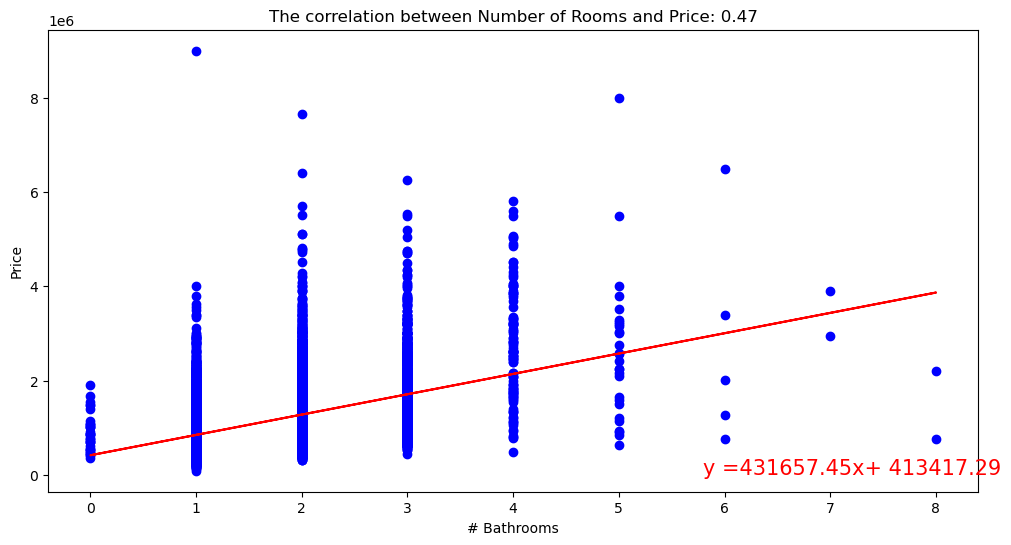

In [743]:
#linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(melhousingclean_df['Bathroom'], melhousingclean_df['Price'])

#to create the plot
x_values = melhousingclean_df['Bathroom']
y_values = slope * x_values + intercept
line_eq= "y ="+ str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.figure(figsize=(12, 6))
plt.scatter(melhousingclean_df['Bathroom'], melhousingclean_df['Price'], color='blue')
plt.plot(x_values, y_values, color='red')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title(f"The correlation between Number of Rooms and Price: {correlationbath:.2f}")
plt.xlabel('# Bathrooms')
plt.ylabel('Price')
print(f"The r-squared is: {r_value**2}")

plt.show()

In [501]:
# Set 'Regionname' as the index (optional, but useful if you need to preserve it)
melhousingclean_df.set_index('Regionname', inplace=True)

# Group by 'Regionname' and calculate the average of 'Price' for each region
average_price_by_region = melhousingclean_df.groupby('Regionname')['Price'].mean()

# Display the result
print(average_price_by_region)

KeyError: "None of ['Regionname'] are in the columns"

In [502]:
# Create a contingency table for RegionName vs. Type

region_Price_heatmap_data = pd.crosstab(average_price_by_region_df['average_price_by_region'], average_price_by_region_df['Regionname'])

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_Price_heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Property Distribution by Region and Type")
plt.xlabel("Price")
plt.ylabel("Region")
plt.show()

NameError: name 'average_price_by_region_df' is not defined